# Introduction to financial technical analysis

# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


## Import and install librairies

In [71]:
%pip install pandas
%pip install yfinance
%pip install lxml
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [72]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np

## Get the list of stocks in the S&P 500 

In [73]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(df_tickers.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [74]:
display(df_tickers)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [75]:
ticker_list = df_tickers['Symbol'].tolist()

## Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [76]:
start_date = '2024-05-01'
end_date = '2025-05-01'

In [77]:

# Download close prices
df_close = yf.download(ticker_list, start=start_date, end=end_date)['Close']

# Display closing prices
display(df_close)

# DEBUGG
#df_close.to_csv("df_close.csv")


C:\Users\esteb\AppData\Local\Temp\ipykernel_31640\290629203.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_close = yf.download(ticker_list, start=start_date, end=end_date)['Close']
[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-01 -> 2025-05-01)')


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,137.376282,168.283661,154.714767,156.160004,103.735443,91.096085,293.442108,469.390015,189.859924,55.668903,...,29.172792,91.453217,51.484386,111.217079,129.094406,66.839996,132.078354,118.202545,309.049988,156.223282
2024-05-02,136.217361,171.991272,153.844193,158.330002,103.374352,90.497009,295.092773,476.570007,192.405914,56.603554,...,29.955240,93.958237,51.493965,111.418373,134.052750,70.300003,131.824600,117.115044,312.709991,164.827911
2024-05-03,138.129089,182.279144,156.695099,159.710007,103.354820,89.774330,298.403900,486.179993,195.480637,56.431885,...,30.032520,95.378410,51.934330,111.188332,135.255371,69.470001,131.112137,120.278717,309.589996,164.670197
2024-05-06,139.278091,180.619171,155.681030,162.000000,103.101067,92.370285,300.712830,493.589996,199.093933,57.404690,...,30.022860,96.522438,52.039631,111.907227,137.217010,73.529999,132.907913,119.191200,315.790009,163.566269
2024-05-07,139.931839,181.305008,155.508820,159.809998,103.618324,93.387741,305.232452,492.269989,199.338745,58.739902,...,29.800680,95.891251,52.671463,111.351288,138.035187,71.599998,132.644409,120.051315,317.869995,166.030365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,106.795090,208.097107,178.825470,121.709999,128.801849,92.099998,291.410004,360.910004,194.345154,48.284031,...,25.294355,81.371361,69.709930,107.638626,115.241966,57.500000,146.859604,101.237473,244.080002,151.792435
2025-04-25,106.056648,209.005920,184.466751,122.510002,128.274216,90.680000,293.390015,367.720001,193.708054,47.759418,...,24.609919,81.900002,68.430580,107.579178,115.730400,58.090000,146.580978,101.247452,246.240005,152.958542
2025-04-28,106.645409,209.864792,190.692963,123.300003,128.951172,91.190002,293.250000,368.619995,192.841995,47.561451,...,25.363791,81.989769,69.005791,107.638626,115.550972,58.320000,147.028778,101.496803,243.490005,153.058212


## Identify Golden and Death Crosses

### Get Moving Averages 50 days and 200 days

In [78]:

# Compute (MA50)
df_ma50 = df_close.rolling(window=50).mean()

# Compute (MA200)
df_ma200 = df_close.rolling(window=200).mean()

# Display results
display(df_ma50)
display(df_ma200)

# DEBUGG
#df_ma50.to_csv("sp500_ma50.csv")

# DEBUGG
#df_ma200.to_csv("sp500_ma200.csv")

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,118.589774,219.229514,194.882048,128.497001,129.695851,91.7206,322.755805,401.392800,204.386194,46.354729,...,28.290147,82.616266,68.725403,109.007224,120.092335,60.865000,151.386326,105.303733,277.851799,158.931158
2025-04-25,117.960953,218.678437,194.779480,128.136801,129.675177,91.7690,320.885378,399.492000,204.194041,46.424616,...,28.199398,82.695181,68.768236,109.031401,119.825021,60.367001,151.415763,105.358225,275.718199,158.535975
2025-04-28,117.376369,218.051459,194.792594,127.782001,129.642278,91.7896,318.998219,397.680000,203.901112,46.480952,...,28.121558,82.734114,68.802902,109.041310,119.530667,59.847600,151.409785,105.399390,274.119598,158.320589


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,133.080366,227.101211,183.261852,130.701575,116.973859,96.197872,340.475853,478.509449,214.891999,52.358255,...,29.730782,85.165791,64.041626,111.437774,125.549300,72.28710,136.723923,106.728764,346.199799,172.881444
2025-04-25,132.988337,227.008164,183.380333,130.551875,117.119244,96.185332,340.478540,477.517949,214.720083,52.293548,...,29.719768,85.156248,64.130068,111.439660,125.467794,72.25500,136.835707,106.711043,345.854800,172.787550
2025-04-28,132.891064,226.898010,183.529514,130.409175,117.261134,96.177719,340.493398,476.538299,214.512770,52.222563,...,29.712475,85.151355,64.220807,111.437109,125.371802,72.22490,136.937421,106.688921,345.453200,172.697851


### Detecting Golden and Death Crosses in the last 14 days

In [79]:

# define a function that detects golden and death crosses in the last 14 days for all stocks 

from datetime import timedelta

common_index = df_ma50.index.intersection(df_ma200.index)
df_ma50 = df_ma50.loc[common_index]
df_ma200 = df_ma200.loc[common_index]
latest_date = common_index.max()
cutoff_date = latest_date - timedelta(days=14)

golden_crosses = []
death_crosses = []

for ticker in df_ma50.columns:
    ma50 = df_ma50[ticker]
    ma200 = df_ma200[ticker]
    crossover = (ma50 > ma200).astype(int).diff()

    # GOLDEN
    gold_dates = crossover[(crossover == 1) & (crossover.index >= cutoff_date)].index
    for date in gold_dates:
        golden_crosses.append({"Ticker": ticker,"Date": date.strftime("%Y-%m-%d"),"Type": "Golden Cross"})

    # DEATH
    death_dates = crossover[(crossover == -1) & (crossover.index >= cutoff_date)].index
    for date in death_dates:
        death_crosses.append({"Ticker": ticker,"Date": date.strftime("%Y-%m-%d"),"Type": "Death Cross"})


df_golden_cross_14d = pd.DataFrame(golden_crosses).sort_values(by=["Date", "Ticker"])
df_death_cross_14d = pd.DataFrame(death_crosses).sort_values(by=["Date", "Ticker"])
df_crosses_recent = pd.concat([df_golden_cross_14d, df_death_cross_14d]).sort_values(by=["Date", "Ticker"])

print (df_crosses_recent)


   Ticker        Date          Type
6     BAC  2025-04-16   Death Cross
7     BLK  2025-04-16   Death Cross
14    FTV  2025-04-16   Death Cross
23    MAR  2025-04-16   Death Cross
24    MCO  2025-04-16   Death Cross
35    SYF  2025-04-16   Death Cross
37    UNP  2025-04-16   Death Cross
4     APO  2025-04-17   Death Cross
2      EW  2025-04-17  Golden Cross
26   NWSA  2025-04-17   Death Cross
27    OKE  2025-04-17   Death Cross
41   WDAY  2025-04-17   Death Cross
0     AMT  2025-04-21  Golden Cross
3     APD  2025-04-21   Death Cross
18   HSIC  2025-04-21   Death Cross
4     KDP  2025-04-21  Golden Cross
33   STLD  2025-04-21   Death Cross
39    WAB  2025-04-21   Death Cross
0     AME  2025-04-22   Death Cross
2    AMZN  2025-04-22   Death Cross
5     AXP  2025-04-22   Death Cross
8     CCL  2025-04-22   Death Cross
9     CEG  2025-04-22   Death Cross
13    DIS  2025-04-22   Death Cross
20   KEYS  2025-04-22   Death Cross
22    LUV  2025-04-22   Death Cross
30     PH  2025-04-22   Deat

In [80]:
# use the display function to show as many intermediary results

from IPython.display import display

# DISPLAY INTERMEDIATE RESULTS
print("Golden Crosses (last 14 days):")
display(df_golden_cross_14d.head())

print("Death Crosses (last 14 days):")
display(df_death_cross_14d.head())

print("All recent crosses (14 days):")
display(df_crosses_recent.head())

Golden Crosses (last 14 days):


,Ticker,Date,Type
2,EW,2025-04-17,Golden Cross
0,AMT,2025-04-21,Golden Cross
4,KDP,2025-04-21,Golden Cross
8,SJM,2025-04-25,Golden Cross
5,MDLZ,2025-04-28,Golden Cross


Death Crosses (last 14 days):


,Ticker,Date,Type
6,BAC,2025-04-16,Death Cross
7,BLK,2025-04-16,Death Cross
14,FTV,2025-04-16,Death Cross
23,MAR,2025-04-16,Death Cross
24,MCO,2025-04-16,Death Cross


All recent crosses (14 days):


,Ticker,Date,Type
6,BAC,2025-04-16,Death Cross
7,BLK,2025-04-16,Death Cross
14,FTV,2025-04-16,Death Cross
23,MAR,2025-04-16,Death Cross
24,MCO,2025-04-16,Death Cross


#### Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

In [81]:
#TOP 10 GOLDEN CROSS (ALPHABETICAL)
print("\nTop 10 Golden Cross Alphabetical (last 14 days):\n")
df_golden_sorted = df_crosses_recent[df_crosses_recent['Type'] == 'Golden Cross'].sort_values(by='Ticker')
top_10_golden_cross = df_golden_sorted.head(10)
print(top_10_golden_cross)



Top 10 Golden Cross Alphabetical (last 14 days):

  Ticker        Date          Type
0    AMT  2025-04-21  Golden Cross
1     CI  2025-04-30  Golden Cross
2     EW  2025-04-17  Golden Cross
3   INVH  2025-04-30  Golden Cross
4    KDP  2025-04-21  Golden Cross
5   MDLZ  2025-04-28  Golden Cross
6    MOH  2025-04-28  Golden Cross
7   SBAC  2025-04-29  Golden Cross
8    SJM  2025-04-25  Golden Cross


#### Death crosses
List the first 10 companies in alphabetical order (by there symbol or ticker) that had a death cross in the last 14 days: 

In [82]:

#TOP 10 DEATH CROSS (ALPHABETICAL)
print("\nTop 10 Death Cross Alphabetical (last 14 days):\n")
df_death_sorted = df_crosses_recent[df_crosses_recent['Type'] == 'Death Cross'].sort_values(by='Ticker')
top_10_death_cross = df_death_sorted.head(10)
print(top_10_death_cross)



Top 10 Death Cross Alphabetical (last 14 days):

  Ticker        Date         Type
0    AME  2025-04-22  Death Cross
1    AMP  2025-04-24  Death Cross
2   AMZN  2025-04-22  Death Cross
3    APD  2025-04-21  Death Cross
4    APO  2025-04-17  Death Cross
5    AXP  2025-04-22  Death Cross
6    BAC  2025-04-16  Death Cross
7    BLK  2025-04-16  Death Cross
8    CCL  2025-04-22  Death Cross
9    CEG  2025-04-22  Death Cross


### Visualization of the results
(in alphabetical order)

In [83]:
print("\nVisualization of the results (Alphabetical)\n")
golden_sorted = df_crosses_recent[df_crosses_recent['Type'] == 'Golden Cross'].sort_values(by='Ticker')
death_sorted = df_crosses_recent[df_crosses_recent['Type'] == 'Death Cross'].sort_values(by='Ticker')
golden_tickers = golden_sorted['Ticker'].tolist()
death_tickers = death_sorted['Ticker'].tolist()

max_len = max(len(golden_tickers), len(death_tickers))
golden_tickers += [''] * (max_len - len(golden_tickers))
death_tickers += [''] * (max_len - len(death_tickers))

df_summary = pd.DataFrame({'Index': range(1, max_len + 1),'Golden Cross': golden_tickers,'Death Cross': death_tickers})
display(df_summary)


Visualization of the results (Alphabetical)



,Index,Golden Cross,Death Cross
0,1,AMT,AME
1,2,CI,AMP
2,3,EW,AMZN
3,4,INVH,APD
4,5,KDP,APO
5,6,MDLZ,AXP
6,7,MOH,BAC
7,8,SBAC,BLK
8,9,SJM,CCL
9,10,,CEG


#### Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot

C:\Users\esteb\AppData\Local\Temp\ipykernel_31640\4248708428.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_returns = df_close.pct_change()


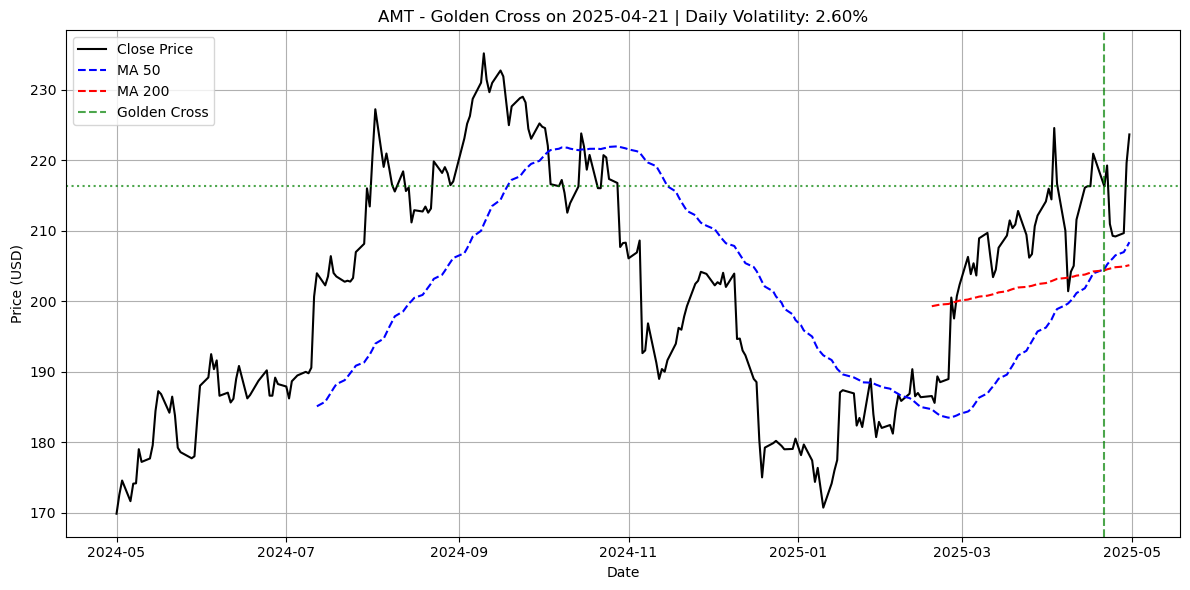

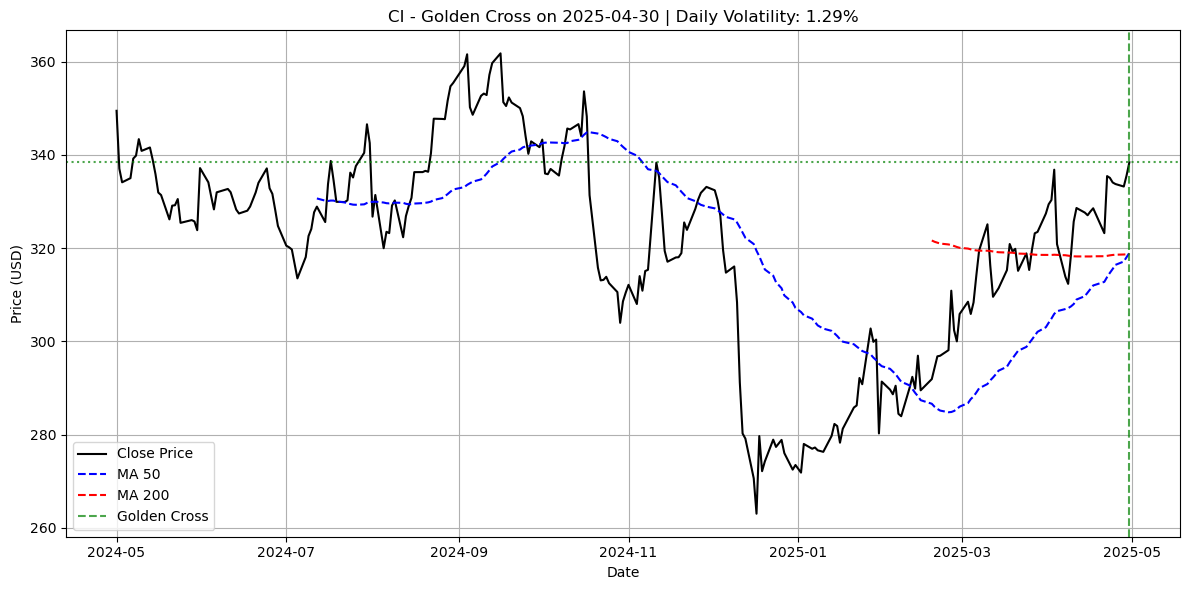

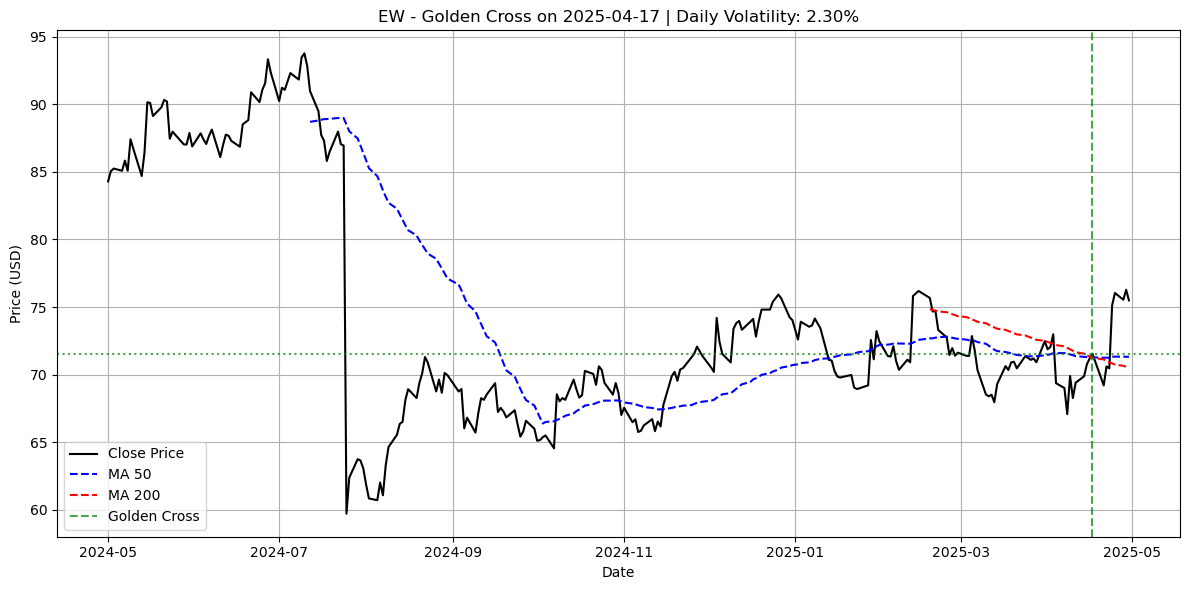

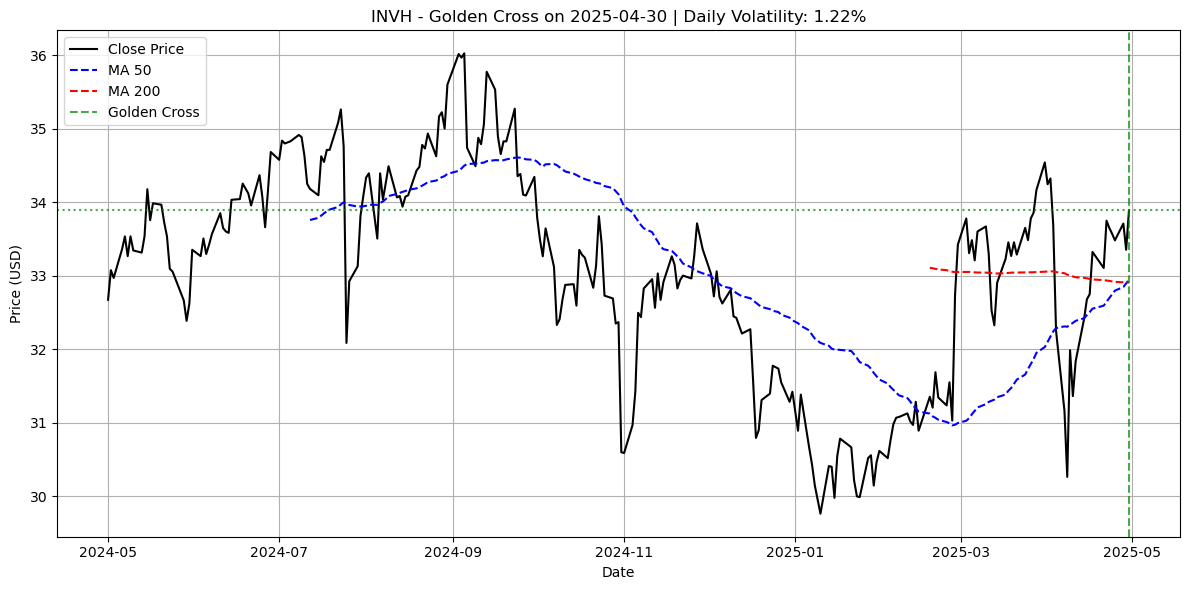

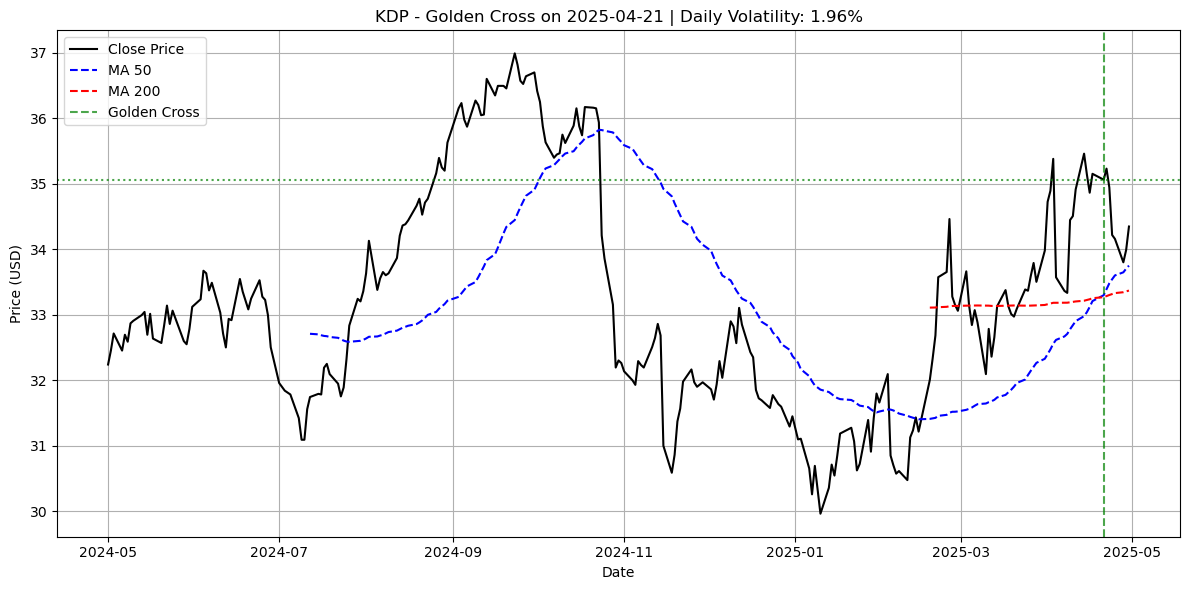

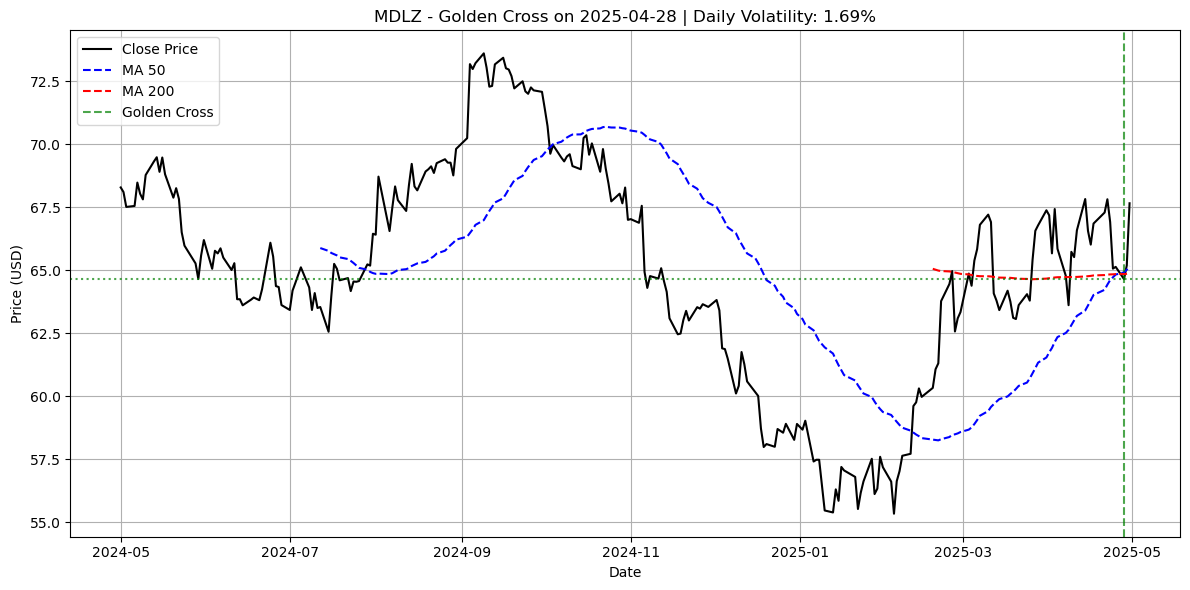

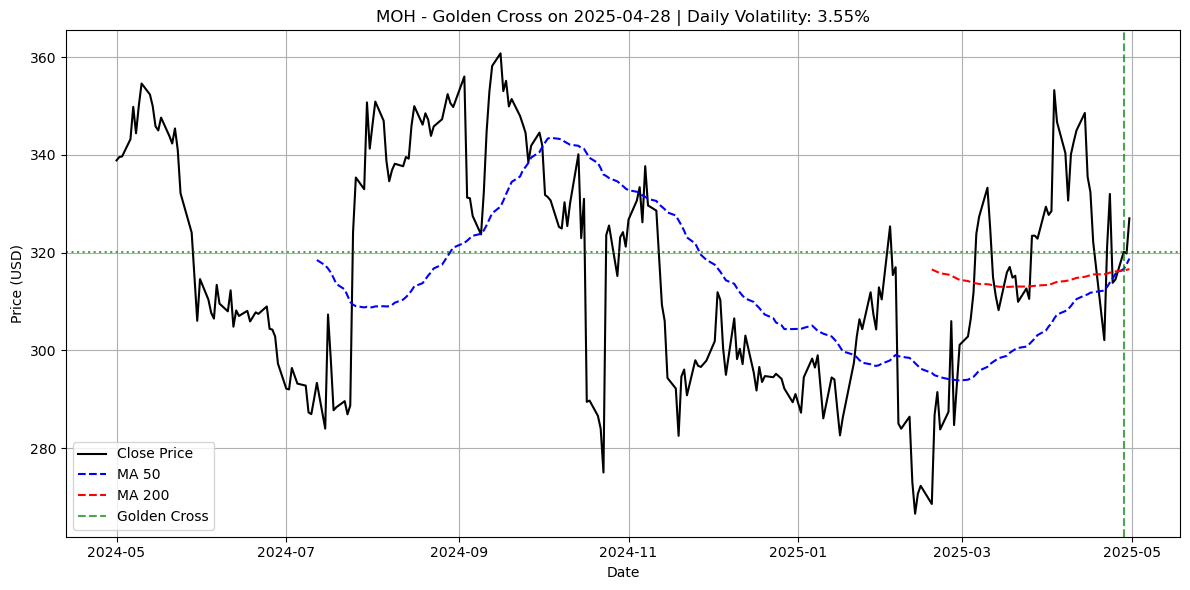

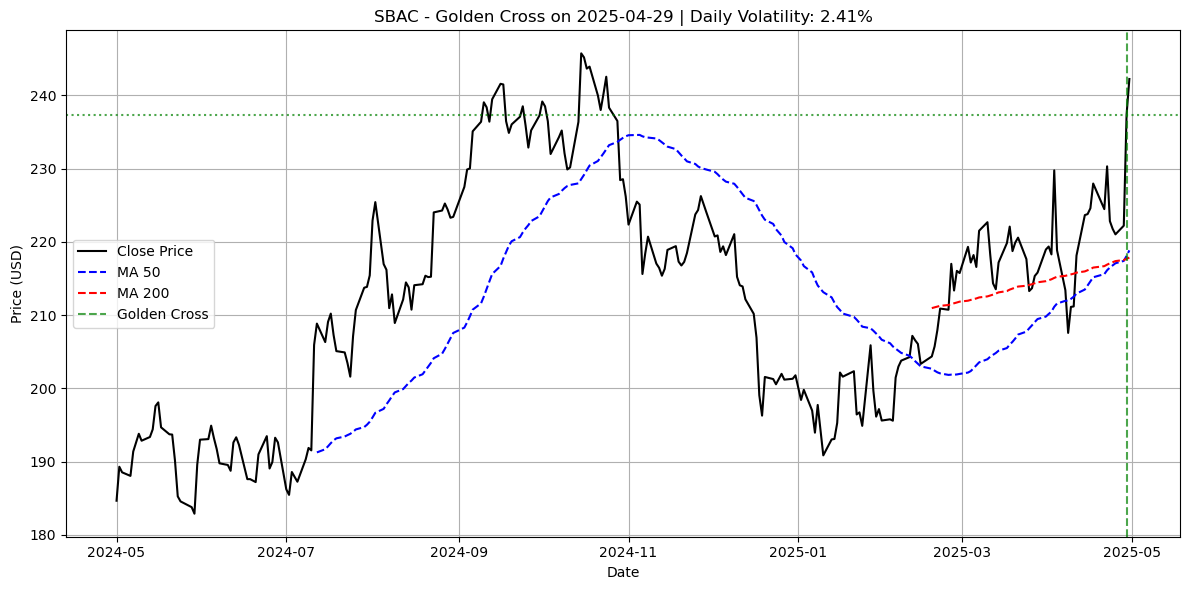

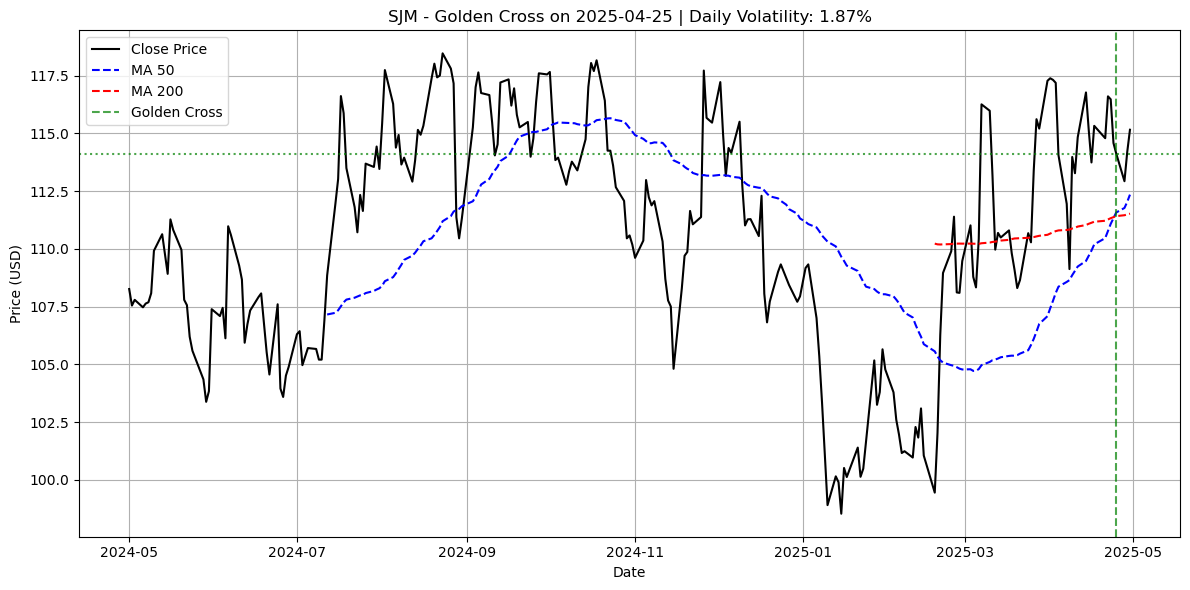

In [84]:
# DAILY RETURNS
df_returns = df_close.pct_change()

# ROLLING STD 14 DAYS
rolling_volatility = df_returns.rolling(window=14).std()


df_top10_golden = df_golden_cross_14d.sort_values(by='Ticker').drop_duplicates(subset='Ticker').head(10)
top10_tickers = df_top10_golden['Ticker'].tolist()


for ticker in top10_tickers:
    if ticker not in df_close.columns:
        continue  

    price = df_close[ticker]
    ma50 = df_ma50[ticker]
    ma200 = df_ma200[ticker]


    cross_row = df_golden_cross_14d[df_golden_cross_14d['Ticker'] == ticker].iloc[0]
    cross_date = pd.to_datetime(cross_row['Date'])
    cross_price = price.loc[cross_date] if cross_date in price.index else np.nan
    cross_vol = rolling_volatility[ticker].loc[cross_date] if cross_date in rolling_volatility.index else np.nan

    plt.figure(figsize=(12, 6))
    plt.plot(price, label='Close Price', color='black')
    plt.plot(ma50, label='MA 50', linestyle='--', color='blue')
    plt.plot(ma200, label='MA 200', linestyle='--', color='red')

    if pd.notna(cross_price):
        plt.axvline(x=cross_date, color='green', linestyle='--', alpha=0.7, label='Golden Cross')
        plt.axhline(y=cross_price, color='green', linestyle=':', alpha=0.7)

    plt.title(f"{ticker} - Golden Cross on {cross_date.date()} | Daily Volatility: {cross_vol:.2%}")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot

C:\Users\esteb\AppData\Local\Temp\ipykernel_31640\2155254885.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_returns = df_close.pct_change()


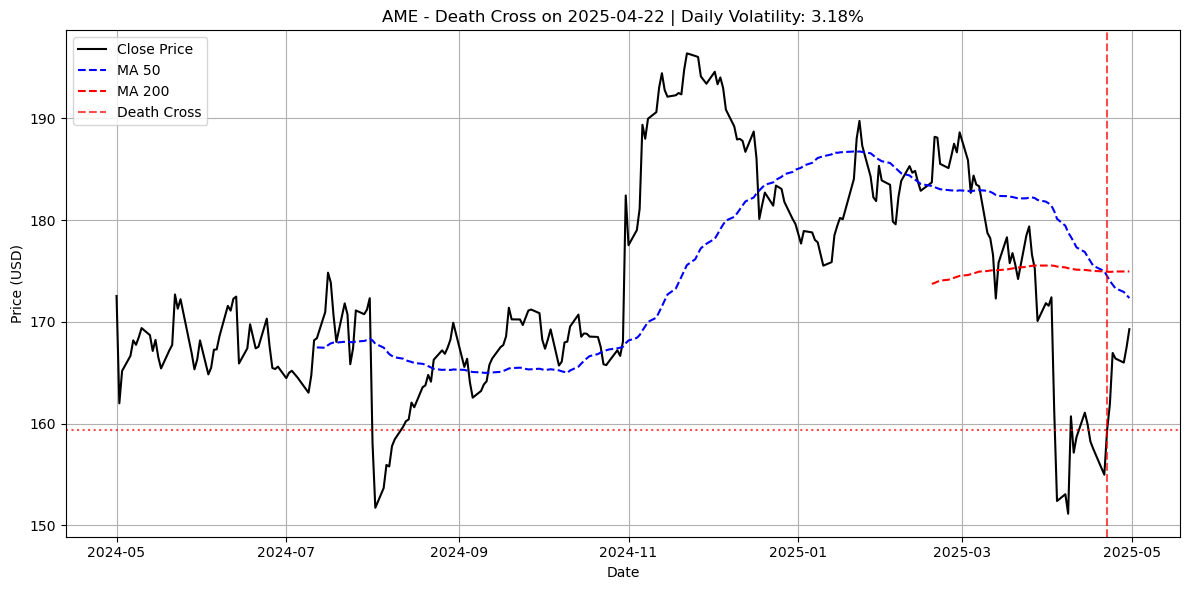

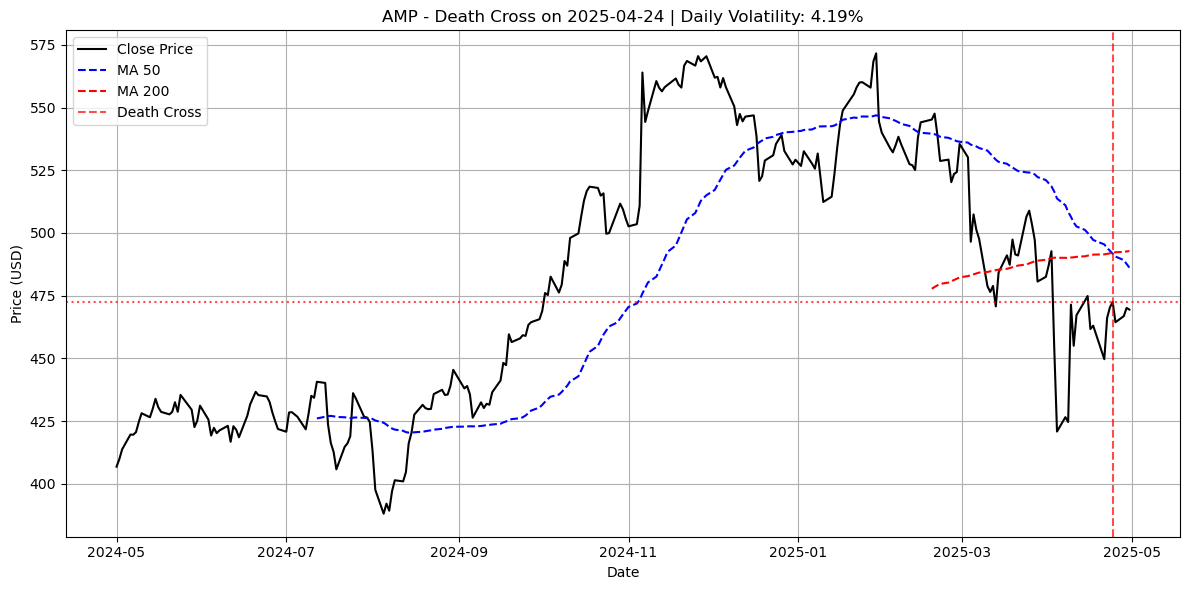

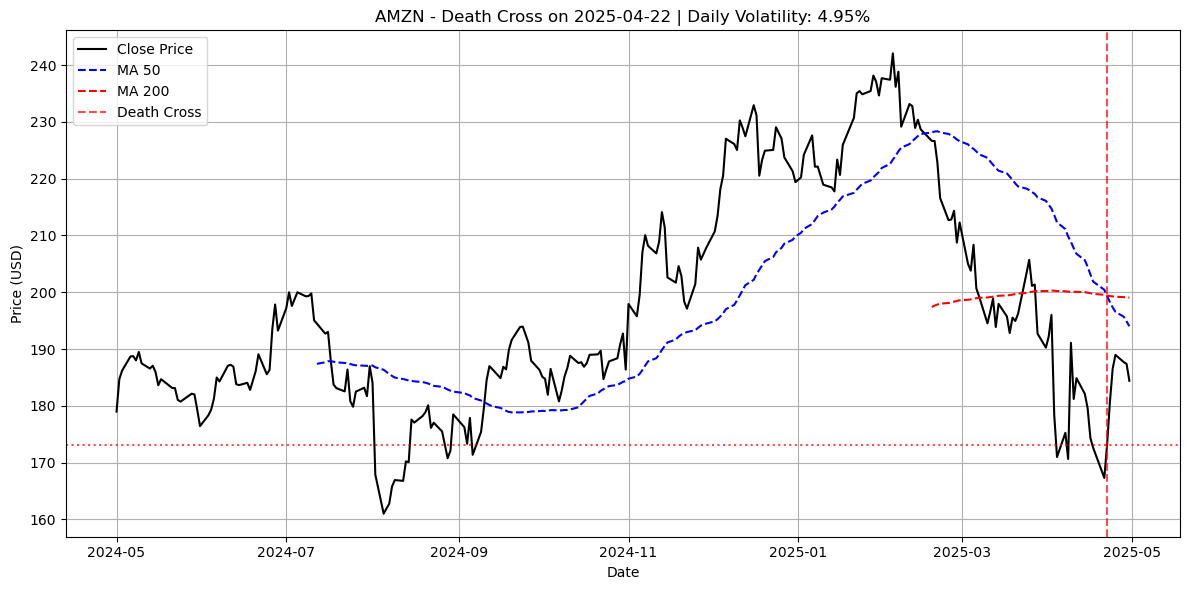

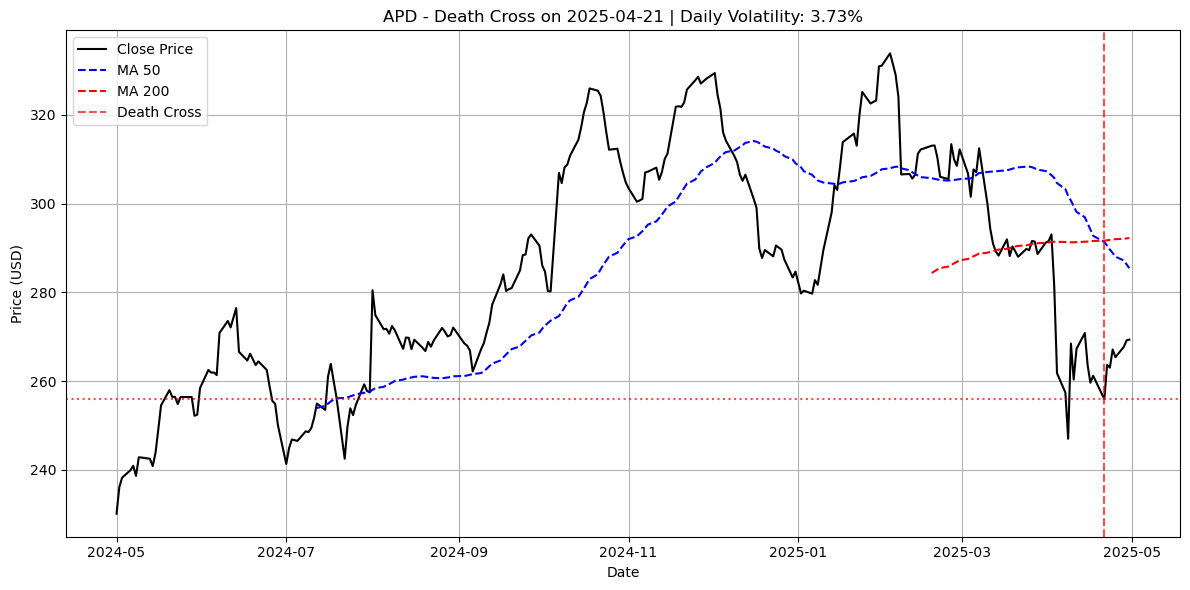

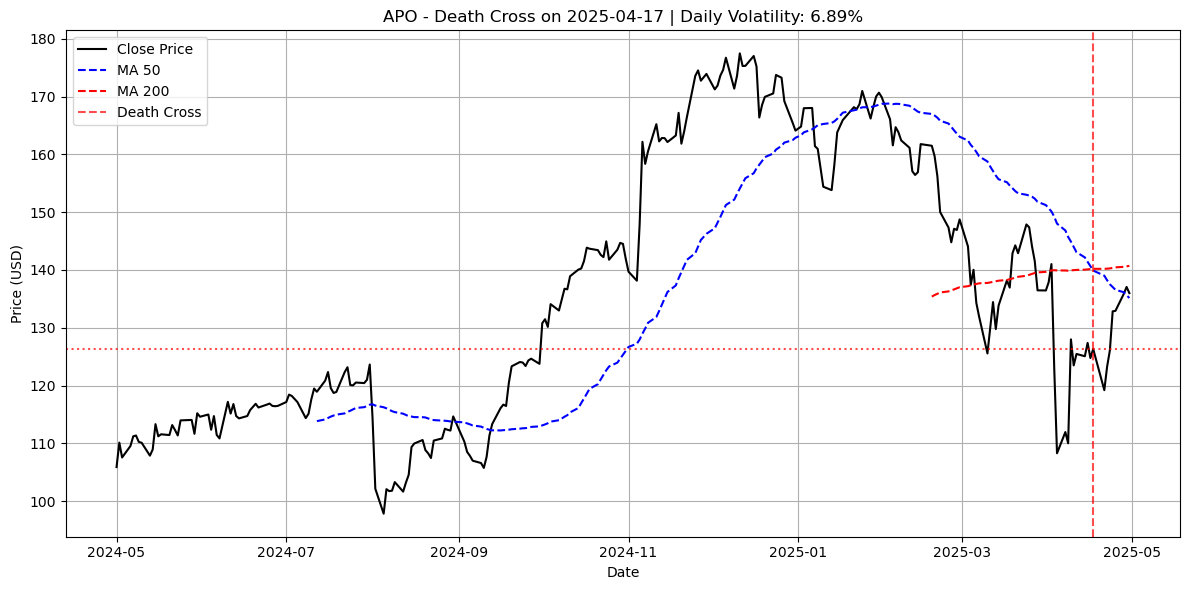

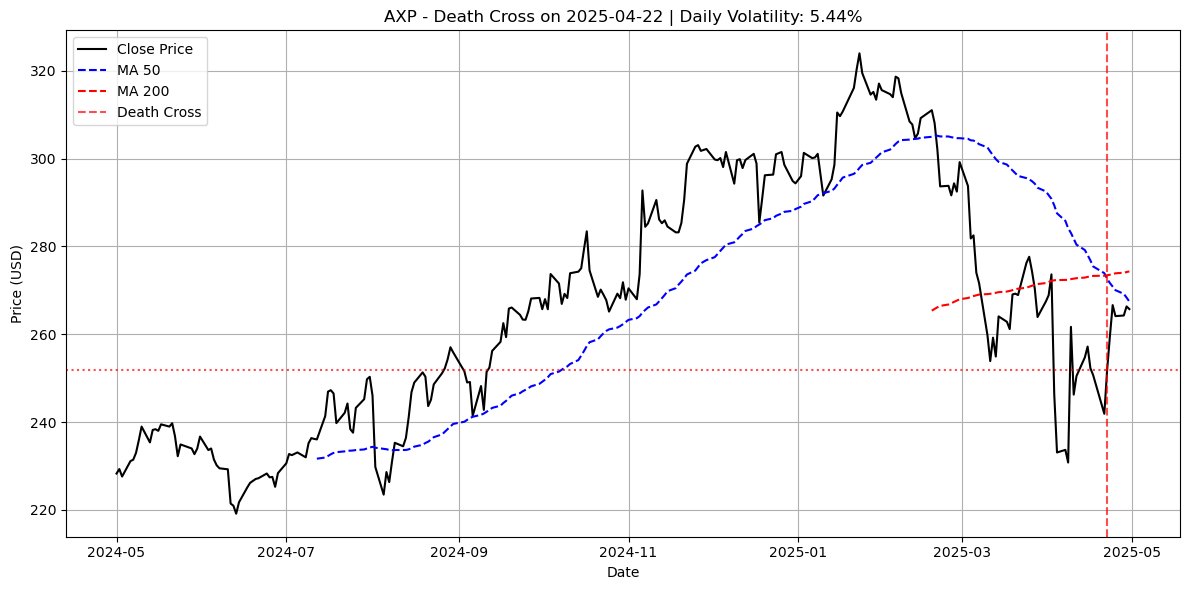

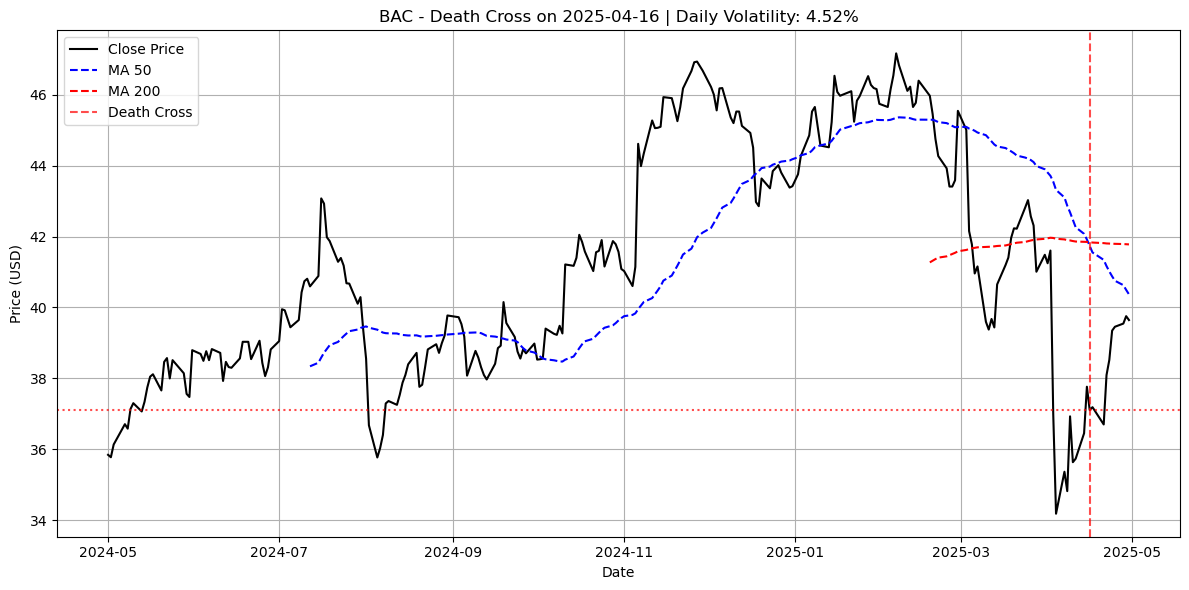

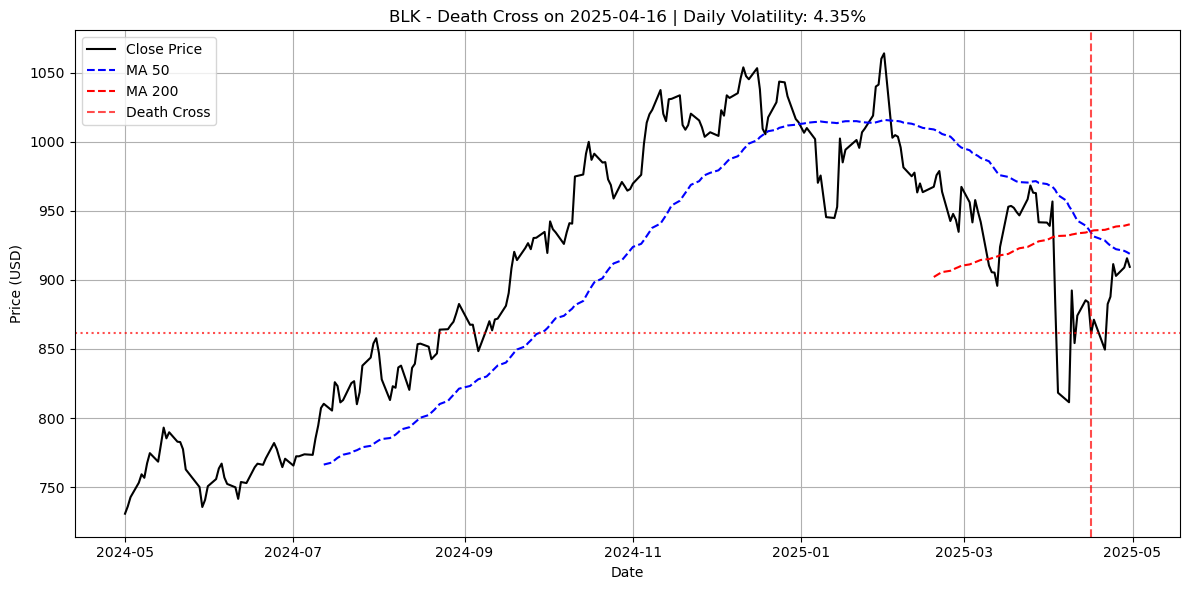

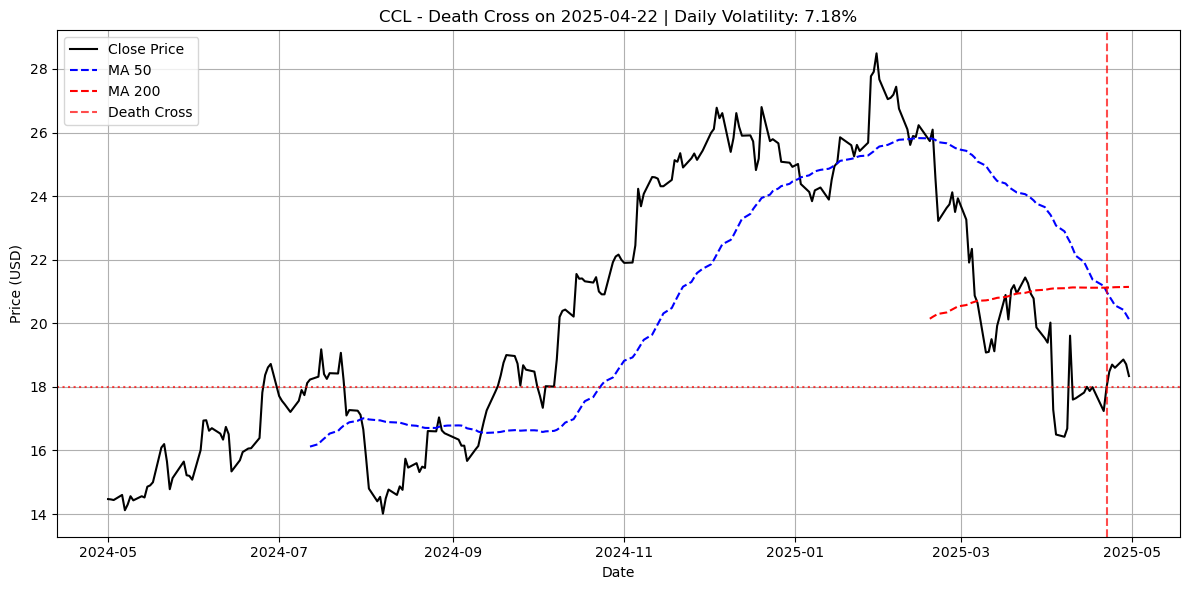

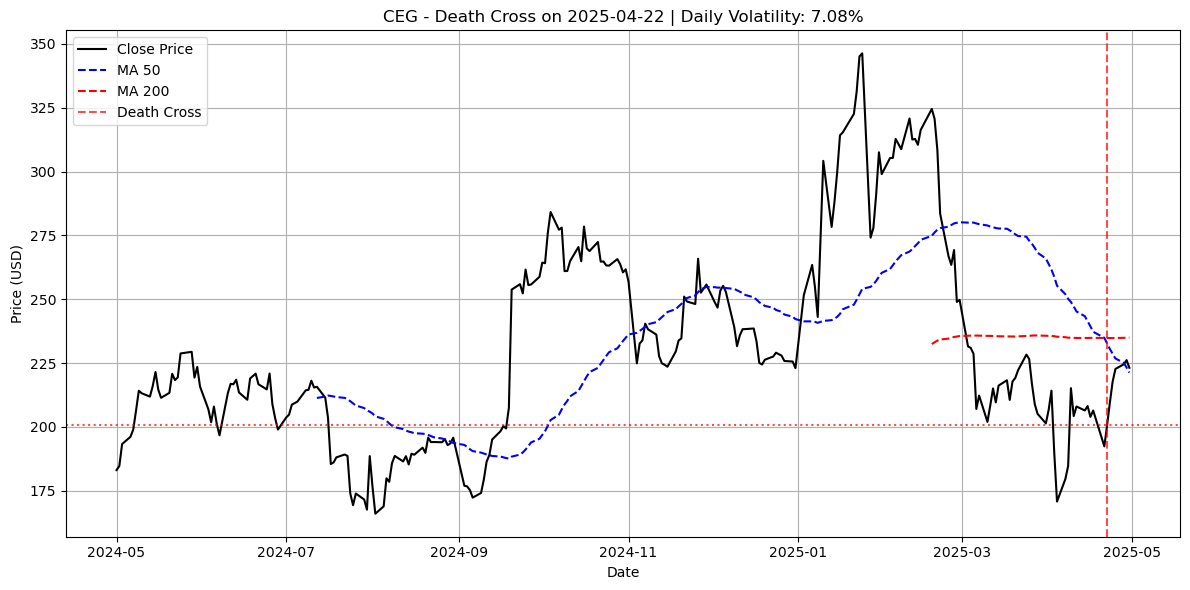

In [85]:
# DAILY RETURNS
df_returns = df_close.pct_change()

#ROLLING STD 14 DAYS
rolling_volatility = df_returns.rolling(window=14).std()

df_top10_death = df_death_cross_14d.sort_values(by='Ticker').drop_duplicates(subset='Ticker').head(10)
top10_tickers_death = df_top10_death['Ticker'].tolist()


for ticker in top10_tickers_death:
    if ticker not in df_close.columns:
        continue  
    price = df_close[ticker]
    ma50 = df_ma50[ticker]
    ma200 = df_ma200[ticker]

    cross_row = df_death_cross_14d[df_death_cross_14d['Ticker'] == ticker].iloc[0]
    cross_date = pd.to_datetime(cross_row['Date'])
    cross_price = price.loc[cross_date] if cross_date in price.index else np.nan
    cross_vol = rolling_volatility[ticker].loc[cross_date] if cross_date in rolling_volatility.index else np.nan

    plt.figure(figsize=(12, 6))
    plt.plot(price, label='Close Price', color='black')
    plt.plot(ma50, label='MA 50', linestyle='--', color='blue')
    plt.plot(ma200, label='MA 200', linestyle='--', color='red')

    if pd.notna(cross_price):
        plt.axvline(x=cross_date, color='red', linestyle='--', alpha=0.7, label='Death Cross')
        plt.axhline(y=cross_price, color='red', linestyle=':', alpha=0.7)

    plt.title(f"{ticker} - Death Cross on {cross_date.date()} | Daily Volatility: {cross_vol:.2%}")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Question section

### Understanding concepts

#### What is a Golden Cross and what does it typically signal to investors?

_A golden cross is a useful pattern of technical analysis, it happens when a short term moving average surpasses the value of a long term moving average, typically when the value of the MA50 passes the value of the MA200, it is a signal of a bullish behavior for the stock._


#### What is a Death Cross and how might market participants react to it?

_In the opposite its the death cross, this forms when the value of a short term moving average falls below the value og a long term moving average, in this ccase is when the value of the MA50 falls below the vaule of the MA200, it is a signal of a bearish behavior, wich coul makje the participants to avoid the sotck or even short it._


#### Why might moving averages (MA50, MA200) be used as indicators in technical analysis?

_Its a very simple way of evaluate the behavior of value of the stock in the last days, relative to its value of the last 200 days, also, they action as a damping factors, softening the impact of the volatility of the trading sessions._


#### Why are the last 14 days used to check for crosses? What are the implications of this choice?

_The 14 days mark assure that has been present a cross (golden or death) and indicate that the trend has continue, its a way of try to get a littel more certainty in a uncertain market, its a way to reduce risks, this could be combined with an analysis of the volatility of the sessions around the date of the cross._


#### How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?

_It´s important to take in account the volatility of the days previous to the cross os the moving averages, a cross in a low volatility session can carry more significance, since its less likely to be caused by randon fluctuations, in otherway if the cross produced in a session of high volatility it could be a false cross, also the increase in voplatility of certain stock after a cross could be an indicator of the strenght of the trend._

### Backtesting and evaluation

#### How would you measure whether Golden Crosses actually lead to profitable trades?

_The way to measure if the golden cross actually lead to a profit cross, would be to simulate a buy position of the stock, triggered by the detection of the golden cross and the confirmation acording to the volatility of the sessions nearby, in order to get more data, the simulation could include all the golden crosses detected in the SP500, with this information it colud be posible to estimate the acurracy of the signal to place an order._


#### What are the risks of using only technical indicators like moving averages without incorporating fundamentals?

_The risk of using only technical indicators and ingoring the fundamentals, is the fact that the context in wich the volatilty or the crosses ocurred is missing, also if its posible to incorporate the fundamental analysis it could reduce the risk of operating without noticing the factor that really move the price_

#### How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?

_One way to reduce false signals is to match the key elements of the fundamental research with the information wich relays on the technical analysis, we can analize the fundamental that drive the volatility in the days nearby a golden cross, this way we can measurre the quality of the informationi we have with the fundamental and technical analisys, also its important to notice that the are a lot of other factors wich afect the movement of the prices realtive to the markets, internal and international politics, enviromental factors etc._


### AI Integration


#### Could sentiment from news (future project part) help validate or invalidate these technical signals?

_Yes, the sentiment analysis of the news could help to validate the technical information we have, we could retrive several news of each ticker and match it with de golden crosses in order to get a little more certainity of the forces on the market wich are affecting the stock._

### Critical thinking

#### From a trading perspective, is this strategy actionable on its own?

_It could give more information to an analyst and he could see the bigger picture if he plans to trade with the index (SP500), the only way to know with a deegre of certanty if the strategy is viable is to measure the results of it, but before analize the results it could be fine tunned in a simulation environment, this way we can tune certain parameters of the analysis in order to make a more roubst strategy, only in this pahe we could determine if the atrategy is actrionable, also, if they can be automated in order to place orders by itself, or if it is still necesary the human touch._

#### Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?

_Yes, analazyng the graphs of the golden crosses, surpraisingly this system consistently predicts an upward movement, but this ins only true for the cases in wich the golden cross occurs days before the last day of data, because in aproximately half of the cases the golden cross was happened in the last days, so there is a little bit of uncertainity on those days, even if the daily close graphs shows a bullish trend._



#### If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?

Conclusions in 2 bullet points:

_-- With the help of AI tools it is possible to analyze huge amounts of data in order to get insights, based on the results of this excercise it is posible to predict with some degree of accuracy the trend of some stocks, this based dolely in the detection of Golden Cross pattern recognition_

_-- It would be important to match the cases we identify with the current fundamental analysis, for this task we could employ AI models for sentiment analysis, this to increase the accuracy of the future estimations of the trend, in order to get a more robust system to identify value inversion opportunities.

Caveats in 2 or 3 bullet points: 

_-- This analysis employs the recognition of golden cross patterns, there could be a lot more great opportunities to invest that we can see with this model, specially if they come from the analysis of fundamental data, wich may take some time to filtrate to the technical analysis.

_-- This system present some lag betwen the fundamental factors that move the price of the action and therefore the capacity of the system to analize the technical data and made a recomendation, so, we could loose the greater part of the movement (gian) of the stock.